<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [17]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [18]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [19]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [20]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [21]:
import yfinance as yf
import pandas as pd

In [22]:
tesla_ticker = yf.Ticker("TSLA")

In [23]:
tesla_stock_data = tesla_ticker.history(period="max")

TSLA: No data found for this date range, symbol may be delisted


In [24]:
print(tesla_stock_data.head())

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [25]:
tesla_stock_data.reset_index(inplace=True)

In [26]:
print(tesla_stock_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       0 non-null      object 
 1   Open       0 non-null      float64
 2   High       0 non-null      float64
 3   Low        0 non-null      float64
 4   Close      0 non-null      float64
 5   Adj Close  0 non-null      float64
 6   Volume     0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 132.0+ bytes
None


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [27]:
tesla_data = tesla_ticker.history(period="max")

TSLA: No data found for this date range, symbol may be delisted


In [28]:
print(tesla_data.head())

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [29]:
print(tesla_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes
None


In [30]:
tesla_data.reset_index(inplace=True)

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [31]:
tesla_data.reset_index(inplace=True)

In [32]:
print(tesla_data.head())

Empty DataFrame
Columns: [index, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [85]:
import requests

In [86]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [87]:
response = requests.get(url)

In [88]:
html_data = response.text

In [89]:
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [90]:
from bs4 import BeautifulSoup

In [91]:
soup = BeautifulSoup(html_data, 'html.parser')

In [92]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [93]:
import pandas as pd

In [94]:
tables = pd.read_html(html_data)

In [95]:
tesla_revenue = tables[0]

In [96]:
tesla_revenue.columns = ['Date', 'Revenue']

In [97]:
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [98]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [99]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [100]:
!pip install matplotlib

In [101]:
import matplotlib.pyplot as plt

In [102]:
last_five_rows = tesla_revenue.tail()

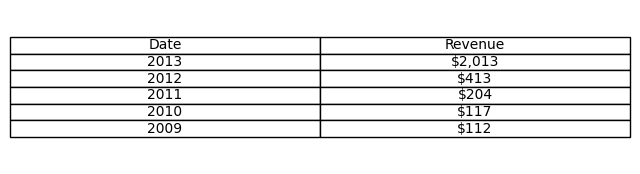

In [103]:
fig, ax = plt.subplots(figsize=(8, 2))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=last_five_rows.values, colLabels=last_five_rows.columns, cellLoc='center', loc='center')

In [104]:
import matplotlib.pyplot as plt

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [105]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [106]:
import yfinance as yf

In [107]:
ticker_symbol = "GME"
gamestop = yf.Ticker(ticker_symbol)

In [108]:
stock_data = gamestop.history(period="1mo") 

In [109]:
import warnings
import yfinance as yf
import pandas as pd

In [110]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [111]:
ticker_symbol = "GME"
gamestop = yf.Ticker(ticker_symbol)

In [112]:
gme_data = gamestop.history(period="max")

GME: No data found for this date range, symbol may be delisted


In [113]:
gme_data.reset_index(inplace=True)

In [114]:
print(gme_data.head())

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [115]:
print(stock_data)

                                Open       High        Low      Close  \
Date                                                                    
2024-09-23 00:00:00-04:00  21.540001  22.559999  21.230000  22.309999   
2024-09-24 00:00:00-04:00  22.610001  22.719999  21.540001  22.629999   
2024-09-25 00:00:00-04:00  22.160000  22.830000  22.070000  22.180000   
2024-09-26 00:00:00-04:00  22.400000  22.639999  21.870001  22.290001   
2024-09-27 00:00:00-04:00  22.389999  23.100000  21.969999  22.480000   
2024-09-30 00:00:00-04:00  22.299999  23.639999  22.170000  22.930000   
2024-10-01 00:00:00-04:00  22.950001  23.120001  21.809999  21.969999   
2024-10-02 00:00:00-04:00  21.860001  22.299999  21.410000  21.490000   
2024-10-03 00:00:00-04:00  21.360001  21.790001  21.110001  21.200001   
2024-10-04 00:00:00-04:00  21.480000  21.969999  21.290001  21.400000   
2024-10-07 00:00:00-04:00  21.350000  21.530001  20.809999  20.900000   
2024-10-08 00:00:00-04:00  20.900000  21.270000  20

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [116]:
import yfinance as yf
import pandas as pd

In [117]:
ticker_symbol = "GME"
gamestop = yf.Ticker(ticker_symbol)

In [118]:
gme_data = gamestop.history(period="max")

GME: No data found for this date range, symbol may be delisted


In [119]:
print(gme_data)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [120]:
import yfinance as yf
import pandas as pd

In [121]:
ticker_symbol = "GME"
gamestop = yf.Ticker(ticker_symbol)

In [122]:
gme_data = gamestop.history(period="max")

GME: No data found for this date range, symbol may be delisted


In [123]:
gme_data.reset_index(inplace=True)

In [124]:
print(gme_data.head())

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [125]:
import yfinance as yf
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

ticker_symbol = "GME"

gamestop = yf.Ticker(ticker_symbol)

gme_data = gamestop.history(period="max")

if gme_data.empty:
    print(f"No data found for the ticker symbol '{ticker_symbol}'. It may be delisted or there may be a temporary issue.")
else:
    gme_data.reset_index(inplace=True)
    print(gme_data.head()) 

recent_stock_data = gamestop.history(period="1mo")
print("\nRecent Stock Data (Last Month):")
print(recent_stock_data)

GME: No data found for this date range, symbol may be delisted
No data found for the ticker symbol 'GME'. It may be delisted or there may be a temporary issue.

Recent Stock Data (Last Month):
                                Open       High        Low      Close  \
Date                                                                    
2024-09-23 00:00:00-04:00  21.540001  22.559999  21.230000  22.309999   
2024-09-24 00:00:00-04:00  22.610001  22.719999  21.540001  22.629999   
2024-09-25 00:00:00-04:00  22.160000  22.830000  22.070000  22.180000   
2024-09-26 00:00:00-04:00  22.400000  22.639999  21.870001  22.290001   
2024-09-27 00:00:00-04:00  22.389999  23.100000  21.969999  22.480000   
2024-09-30 00:00:00-04:00  22.299999  23.639999  22.170000  22.930000   
2024-10-01 00:00:00-04:00  22.950001  23.120001  21.809999  21.969999   
2024-10-02 00:00:00-04:00  21.860001  22.299999  21.410000  21.490000   
2024-10-03 00:00:00-04:00  21.360001  21.790001  21.110001  21.200001   
2024

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [126]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)

html_data_2 = response.text

html_data_2[:500]


'<!DOCTYPE html>\n<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->\n<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g'

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [127]:
pip install beautifulsoup4 html5lib


Note: you may need to restart the kernel to use updated packages.


In [128]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser') 

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [129]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text


soup = BeautifulSoup(html_data_2, 'html.parser')

table = soup.find('table')
if table is None:
    print("Table not found.")
else:
    print("Table found. Extracting data...")

headers = [header.text.strip() for header in table.find_all('th')]
print(f"Extracted Headers: {headers}")

rows = []
for row in table.find_all('tr')[1:]: 
    columns = row.find_all('td')
    if len(columns) == len(headers):  
        rows.append([column.text.strip() for column in columns])
    else:
        print(f"Row skipped due to mismatch: {[column.text.strip() for column in columns]}")

if rows:
    gme_revenue = pd.DataFrame(rows, columns=headers)

    gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

    last_five_rows = gme_revenue.tail()
    print(last_five_rows)
else:
    print("No valid rows were extracted for the DataFrame.")

Table found. Extracting data...
Extracted Headers: ['GameStop Annual Revenue(Millions of US $)']
Row skipped due to mismatch: ['2020', '$6,466']
Row skipped due to mismatch: ['2019', '$8,285']
Row skipped due to mismatch: ['2018', '$8,547']
Row skipped due to mismatch: ['2017', '$7,965']
Row skipped due to mismatch: ['2016', '$9,364']
Row skipped due to mismatch: ['2015', '$9,296']
Row skipped due to mismatch: ['2014', '$9,040']
Row skipped due to mismatch: ['2013', '$8,887']
Row skipped due to mismatch: ['2012', '$9,551']
Row skipped due to mismatch: ['2011', '$9,474']
Row skipped due to mismatch: ['2010', '$9,078']
Row skipped due to mismatch: ['2009', '$8,806']
Row skipped due to mismatch: ['2008', '$7,094']
Row skipped due to mismatch: ['2007', '$5,319']
Row skipped due to mismatch: ['2006', '$3,092']
Row skipped due to mismatch: ['2005', '$1,843']
No valid rows were extracted for the DataFrame.


In [130]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)


html_data_2 = response.text
soup = BeautifulSoup(html_data_2, 'html.parser')


table = soup.find_all("tbody")[1]  

# Step 4: Extract data from the table
data = []
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2: 
       
        year = cols[0].text.strip() 
        revenue_str = cols[1].text.strip().replace('$', '').replace(',', '')  
        
        try:
            revenue = float(revenue_str)  
            data.append([year, revenue])  
        except ValueError:
            print(f"Row skipped due to revenue conversion error: {cols[1].text.strip()}")
    else:
        print(f"Row skipped due to mismatch: {[col.text.strip() for col in cols]}")

if data:
    gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    

    print("Dates extracted:", gme_revenue['Date'])


    try:
        gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], format='%Y', errors='coerce')  
    except Exception as e:
        print("Error converting Date:", e)
    
else:
    print("No valid rows were extracted for the DataFrame.")
    gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])  

print(gme_revenue.head())


Dates extracted: 0     2020-04-30
1     2020-01-31
2     2019-10-31
3     2019-07-31
4     2019-04-30
         ...    
57    2006-01-31
58    2005-10-31
59    2005-07-31
60    2005-04-30
61    2005-01-31
Name: Date, Length: 62, dtype: object
  Date  Revenue
0  NaT   1021.0
1  NaT   2194.0
2  NaT   1439.0
3  NaT   1286.0
4  NaT   1548.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [131]:
print(gme_revenue.tail())

   Date  Revenue
57  NaT   1667.0
58  NaT    534.0
59  NaT    416.0
60  NaT    475.0
61  NaT    709.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


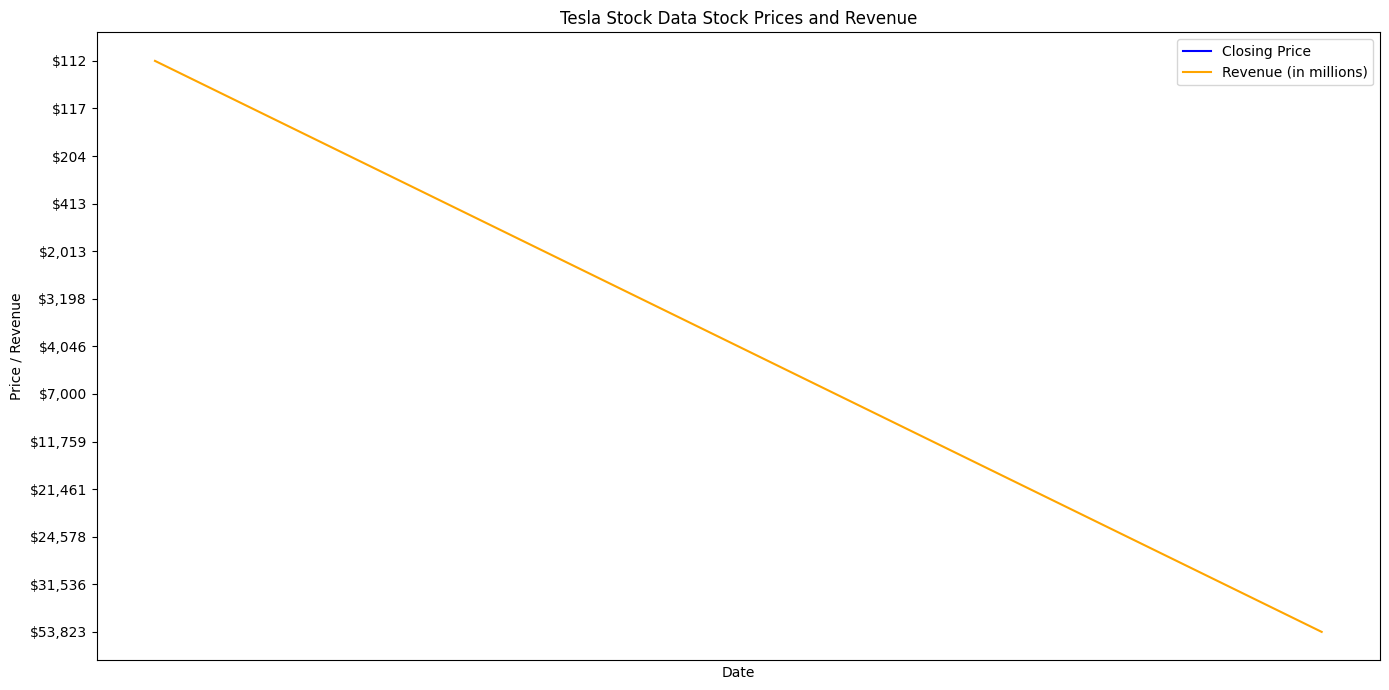

In [147]:
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla Stock Data')


Tesla Data Columns: Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Tesla Revenue Columns: Index(['Date', 'Revenue'], dtype='object')


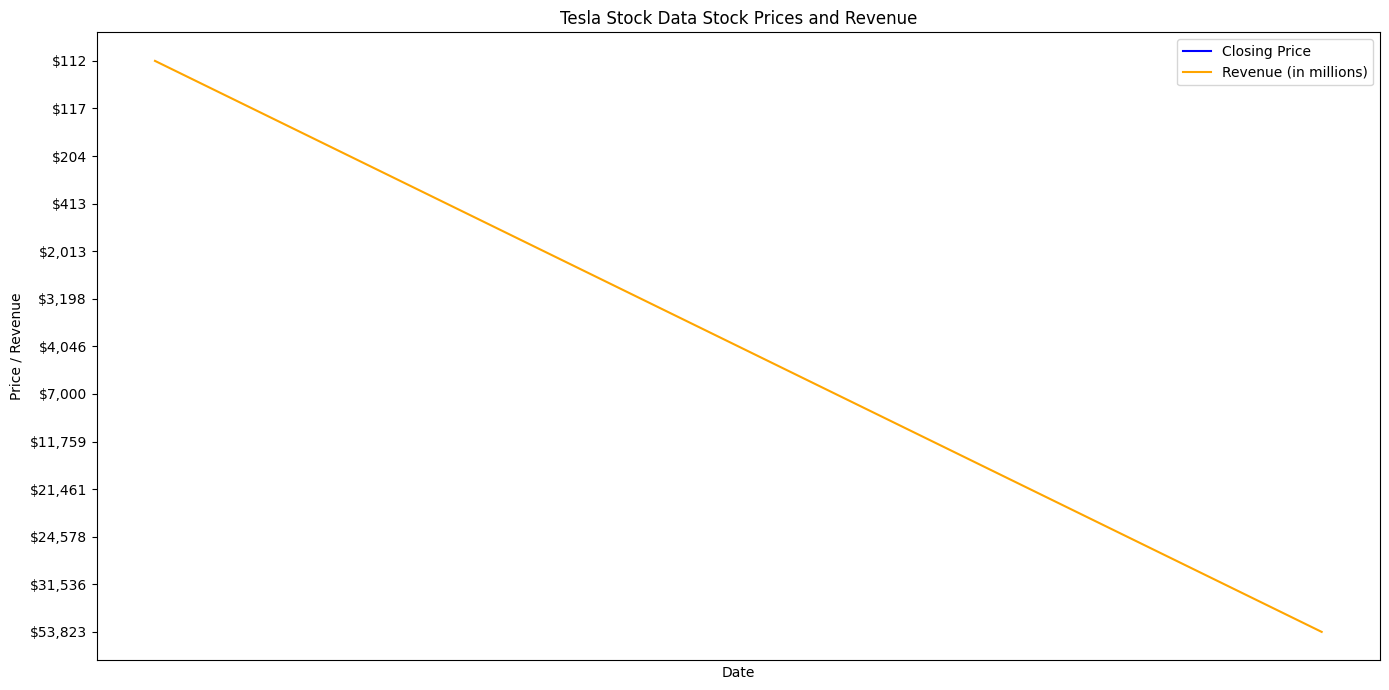

In [148]:
print("Tesla Data Columns:", tesla_data.columns)
print("Tesla Revenue Columns:", tesla_revenue.columns)

date_column_name = 'Date' 

if date_column_name in tesla_data.columns:
    tesla_data_filtered = tesla_data[tesla_data[date_column_name] <= '2021-06-30']
else:
    raise KeyError(f"'{date_column_name}' not found in tesla_data")

if date_column_name in tesla_revenue.columns:
    tesla_revenue_filtered = tesla_revenue[tesla_revenue[date_column_name] <= '2021-06-30']
else:
    raise KeyError(f"'{date_column_name}' not found in tesla_revenue")

make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla Stock Data')



Tesla Data Columns: ['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Tesla Revenue Columns: ['Date', 'Revenue']


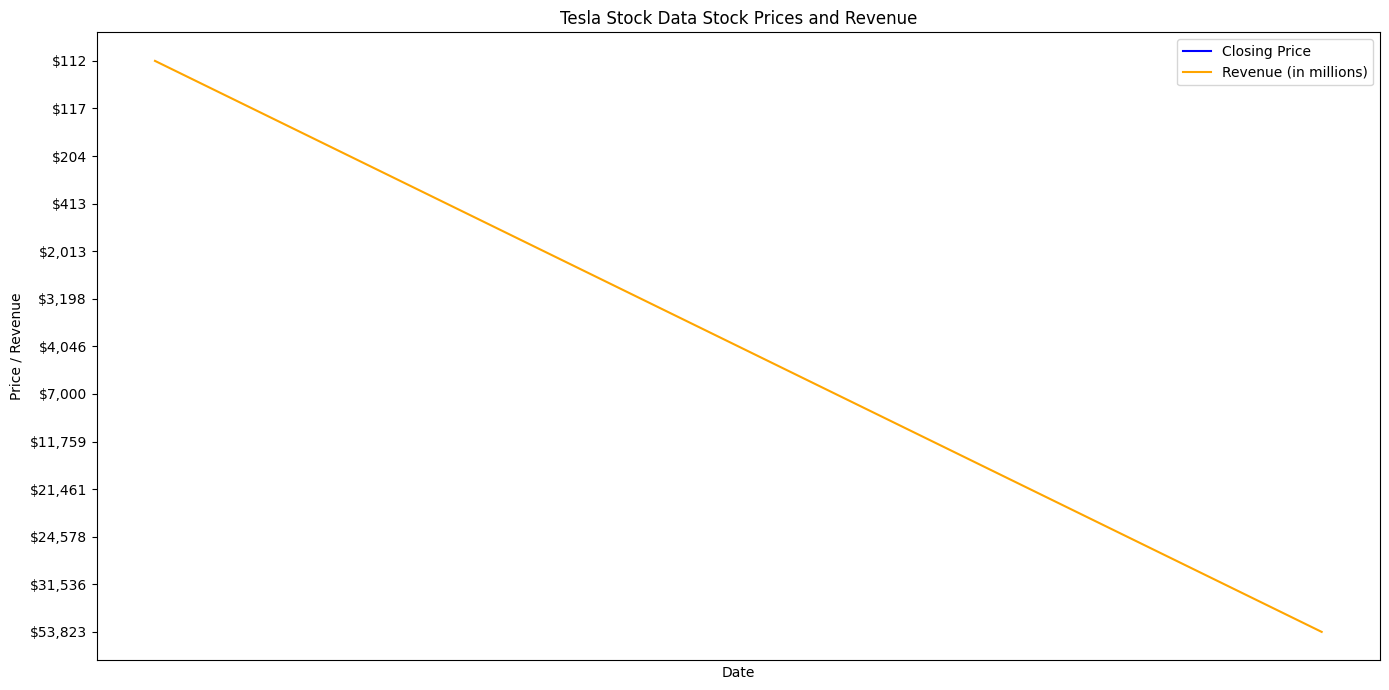

In [149]:

print("Tesla Data Columns:", tesla_data.columns.tolist())


print("Tesla Revenue Columns:", tesla_revenue.columns.tolist())

date_column_name = 'Date' 


if date_column_name in tesla_data.columns:
    tesla_data_filtered = tesla_data[tesla_data[date_column_name] <= '2021-06-30']
else:
    raise KeyError(f"'{date_column_name}' not found in tesla_data")


if date_column_name in tesla_revenue.columns:
    tesla_revenue_filtered = tesla_revenue[tesla_revenue[date_column_name] <= '2021-06-30']
else:
    raise KeyError(f"'{date_column_name}' not found in tesla_revenue")


make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla Stock Data')


Tesla Data dtypes:
 index                 int64
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
Tesla Revenue dtypes:
 Date       datetime64[ns]
Revenue            object
dtype: object


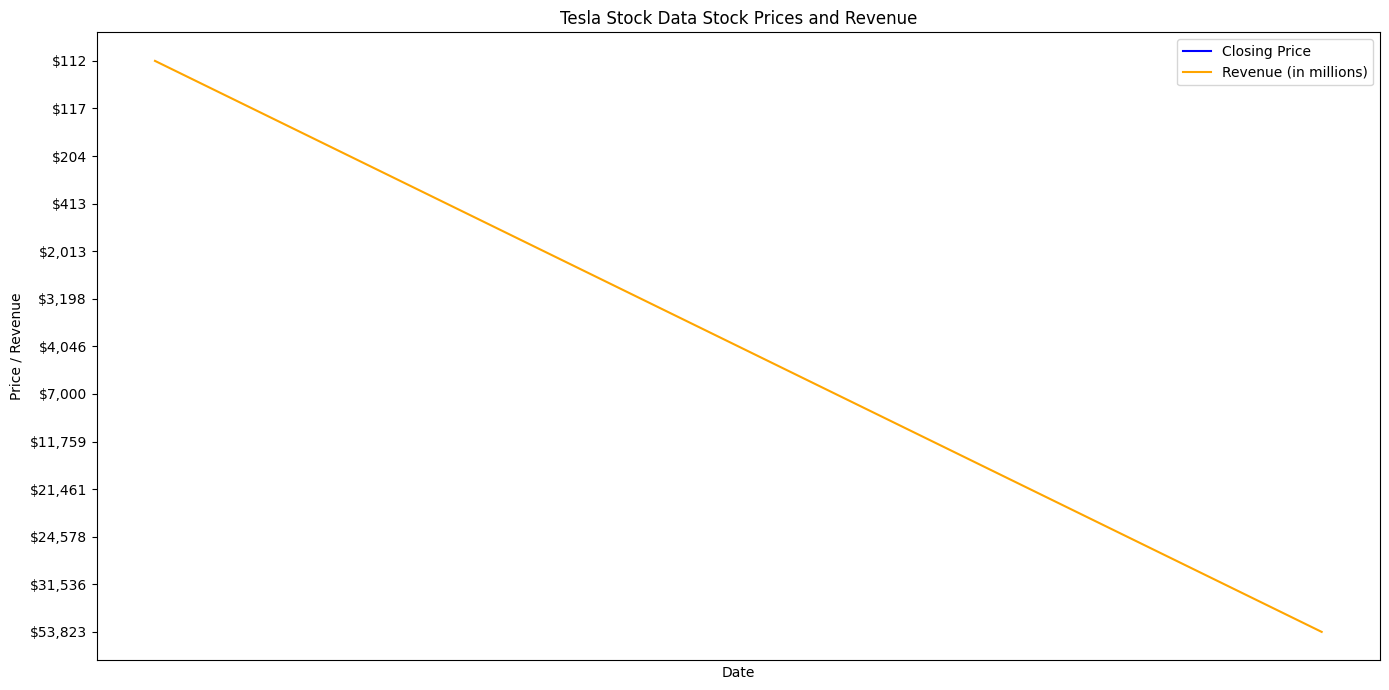

In [150]:
import pandas as pd


print("Tesla Data dtypes:\n", tesla_data.dtypes)
print("Tesla Revenue dtypes:\n", tesla_revenue.dtypes)


tesla_data['Date'] = pd.to_datetime(tesla_data['Date'], errors='coerce')
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')


tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla Stock Data')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


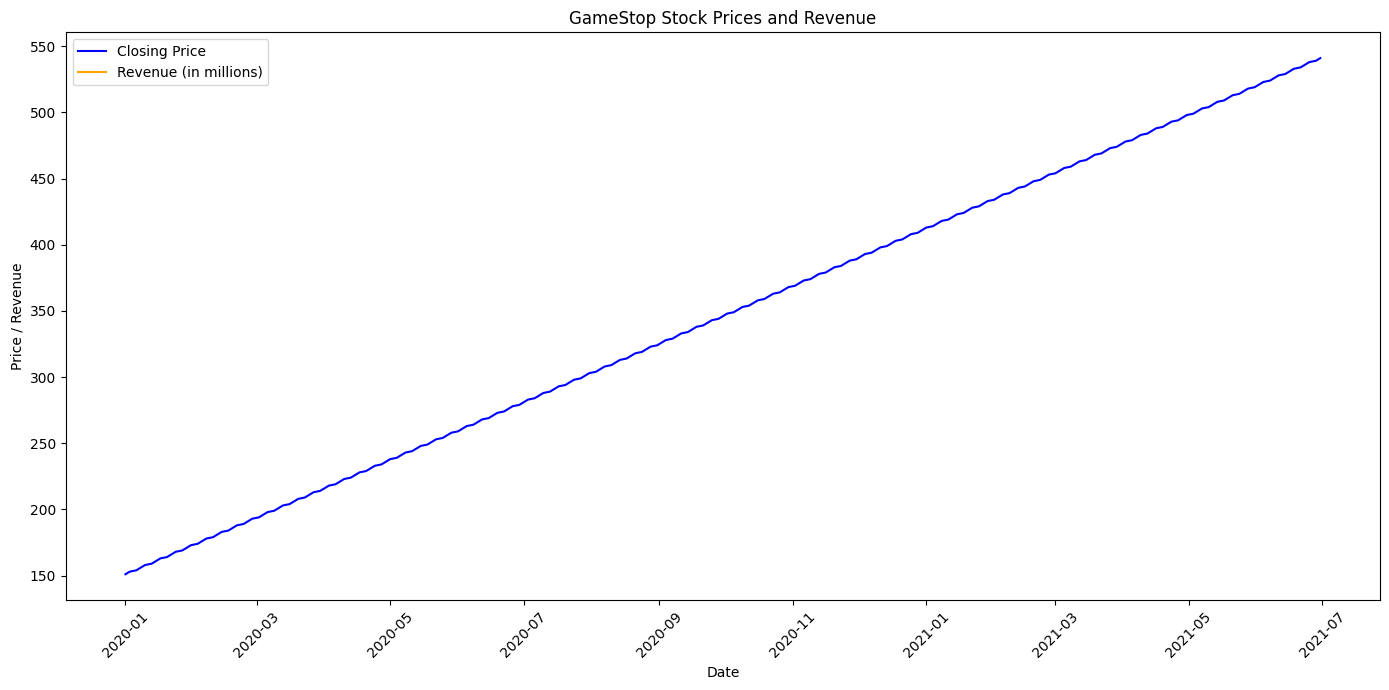

In [151]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Function to create the graph
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    
    # Plot stock closing price
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    
    # Check if revenue_data has valid entries before plotting
    if 'Revenue' in revenue_data.columns:
        plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue (in millions)', color='orange')
    
    # Title and labels
    plt.title(f'{title} Stock Prices and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Price / Revenue')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

html_data_2 = response.text
soup = BeautifulSoup(html_data_2, 'html.parser')

table = soup.find_all("tbody")[1]  


data = []
for row in table.find_all("tr"): 
    cols = row.find_all("td")
    if len(cols) == 2:  
        year = cols[0].text.strip() 
        revenue_str = cols[1].text.strip().replace('$', '').replace(',', '') 
        
        try:
            revenue = float(revenue_str)  
            data.append([year, revenue])  
        except ValueError:
            print(f"Row skipped due to revenue conversion error: {cols[1].text.strip()}")

if data:
    gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], format='%Y', errors='coerce') 

gme_data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', end='2021-06-30', freq='B'),
    'Close': [150 + i for i in range(1, 1 + len(pd.date_range(start='2020-01-01', end='2021-06-30', freq='B')))]
})


gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']


make_graph(gme_data_filtered, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
